## 1:Loading the Data 

#### 1.1 Importing Necessary Libraries and packages

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

pd.set_option('display.max_columns', None)



In [36]:

inv_item = pd.read_csv('inv_item.txt', sep='|', header=1, names=[ 'item_id', 'name', 'description', 'department_id', 'default_price_id',
    'has_expiration', 'concept_id', 'creator', 'date_created', 'changed_by',
    'date_changed', 'retired', 'retired_by', 'date_retired', 'retire_reason',
    'uuid', 'has_physical_inventory', 'default_expiration_period',
    'concept_accepted', 'minimum_quantity', 'buying_price'],index_col='item_id')

inv_item_price = pd.read_csv('inv_item_price.txt', sep='|', header=1, names=[
    'item_price_id', 'item_id', 'price', 'name', 'description', 
    'creator', 'date_created', 'changed_by', 'date_changed', 
    'retired', 'retired_by', 'uuid', 'has_expiration'
])

inv_item_stock = pd.read_csv('inv_item_stock.txt',sep='|', header=1, names=[
    'item_stock_id', 'stockroom_id', 'item_id', 'quantity', 'uuid'
],index_col='item_stock_id')

inv_stockroom = pd.read_csv('inv_stockroom.txt',sep='|', header=1, names=[
    'stockroom_id', 'name', 'description', 'location_id', 'creator', 'date_created', 'changed_by', 'date_changed', 'retired', 'retired_by', 'date_retired', 'retire_reason', 'uuid'
],index_col='stockroom_id')

print(inv_item.columns)
print(inv_item_price.columns)
print(inv_item_stock.columns)
print(inv_stockroom.columns)

Index(['name', 'description', 'department_id', 'default_price_id',
       'has_expiration', 'concept_id', 'creator', 'date_created', 'changed_by',
       'date_changed', 'retired', 'retired_by', 'date_retired',
       'retire_reason', 'uuid', 'has_physical_inventory',
       'default_expiration_period', 'concept_accepted', 'minimum_quantity',
       'buying_price'],
      dtype='object')
Index(['item_price_id', 'item_id', 'price', 'name', 'description', 'creator',
       'date_created', 'changed_by', 'date_changed', 'retired', 'retired_by',
       'uuid', 'has_expiration'],
      dtype='object')
Index(['stockroom_id', 'item_id', 'quantity', 'uuid'], dtype='object')
Index(['name', 'description', 'location_id', 'creator', 'date_created',
       'changed_by', 'date_changed', 'retired', 'retired_by', 'date_retired',
       'retire_reason', 'uuid'],
      dtype='object')


In [37]:
# Display the first few rows of the dataframe 
pd.set_option('display.max_columns', None)
print(inv_item.head())
print(inv_item_price.head())
print(inv_item_stock.head())
print(inv_stockroom.head())



                          name description  department_id  default_price_id  \
item_id                                                                       
685               Gloves Clean         NaN              4              1552   
686           Consultation Fee         NaN              4              1562   
687       Anc Consultation Fee         NaN              6              1564   
688                Anc Profile         NaN              6              5627   
689      Urine Dipstick In Anc         NaN              6               777   

         has_expiration  concept_id  creator         date_created  changed_by  \
item_id                                                                         
685                   0         NaN        1  2013-01-11 10:55:37         3.0   
686                   0         NaN        1  2013-01-11 10:55:37         3.0   
687                   0         NaN        1  2013-01-11 10:55:37         3.0   
688                   0         NaN      

## 2:Data Preprocessing

### inv_item

In [38]:
inv_item.head().style.set_properties(**{'text-align': 'left'})

,name,description,department_id,default_price_id,has_expiration,concept_id,creator,date_created,changed_by,date_changed,retired,retired_by,date_retired,retire_reason,uuid,has_physical_inventory,default_expiration_period,concept_accepted,minimum_quantity,buying_price
item_id,,,,,,,,,,,,,,,,,,,,
685,Gloves Clean,nan,4,1552,0,nan,1,2013-01-11 10:55:37,3.000000,2013-01-22 10:33:51,0,nan,nan,nan,593344E3-5457-1D50-1F1C-7D71D4A20663,1,nan,0.000000,nan,nan
686,Consultation Fee,nan,4,1562,0,nan,1,2013-01-11 10:55:37,3.000000,2013-01-22 10:34:49,0,nan,nan,nan,EAEF4B12-3657-CA93-A6EC-A8F07E059BD8,1,nan,0.000000,nan,nan
687,Anc Consultation Fee,nan,6,1564,0,nan,1,2013-01-11 10:55:37,3.000000,2013-01-22 10:35:27,0,nan,nan,nan,D41F3D92-180C-4AB9-E4CC-A67CCD14C7A7,1,nan,0.000000,nan,nan
688,Anc Profile,nan,6,5627,0,nan,1,2013-01-11 10:55:37,8.000000,2014-04-04 11:07:20,0,nan,nan,nan,8A5F9FDB-0579-0C6E-CDBE-B67C376F99B4,1,nan,0.000000,nan,nan
689,Urine Dipstick In Anc,nan,6,777,0,nan,1,2013-01-11 10:55:37,nan,nan,0,nan,nan,nan,7445CEBE-545C-CA82-35D7-B9276342C6F6,1,nan,0.000000,nan,nan


In [39]:
inv_item['buying_price'].value_counts()


buying_price
15.00      10
3.00        9
8.00        8
40.00       7
7.00        6
           ..
55.00       1
51.00       1
1.87        1
0.33        1
1972.00     1
Name: count, Length: 206, dtype: int64

In [40]:
inv_item.info()

<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, 685 to 1631
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       936 non-null    object 
 1   description                1 non-null      object 
 2   department_id              936 non-null    int64  
 3   default_price_id           936 non-null    int64  
 4   has_expiration             936 non-null    int64  
 5   concept_id                 1 non-null      float64
 6   creator                    936 non-null    int64  
 7   date_created               936 non-null    object 
 8   changed_by                 552 non-null    float64
 9   date_changed               552 non-null    object 
 10  retired                    936 non-null    int64  
 11  retired_by                 14 non-null     float64
 12  date_retired               14 non-null     object 
 13  retire_reason              8 non-null      object 
 

### inv_item_price

In [41]:

inv_item_price.set_index('item_price_id', inplace=True)
inv_item_price.head().style.set_properties(**{'text-align': 'left'})

,item_id,price,name,description,creator,date_created,changed_by,date_changed,retired,retired_by,uuid,has_expiration
item_price_id,,,,,,,,,,,,
691,90.000000,OPD,nan,1,2013-01-11 10:55:37,nan,nan,0,nan,nan,nan,47630d9b-5bc4-11e2-a081-b4b52f5b1c99
692,30.000000,OPD,nan,1,2013-01-11 10:55:37,nan,nan,0,nan,nan,nan,4763100a-5bc4-11e2-a081-b4b52f5b1c99
693,635.000000,OPD,nan,1,2013-01-11 10:55:37,nan,nan,0,nan,nan,nan,4763125b-5bc4-11e2-a081-b4b52f5b1c99
694,880.000000,OPD,nan,1,2013-01-11 10:55:37,nan,nan,0,nan,nan,nan,4763149b-5bc4-11e2-a081-b4b52f5b1c99
695,515.000000,OPD,nan,1,2013-01-11 10:55:37,nan,nan,0,nan,nan,nan,476316e4-5bc4-11e2-a081-b4b52f5b1c99


In [42]:
inv_item_price['date_created'] = pd.to_datetime(inv_item_price['date_created'], infer_datetime_format=True)
inv_item_price['date_changed'] = pd.to_datetime(inv_item_price['date_changed'], infer_datetime_format=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_14072\3284703314.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  inv_item_price['date_created'] = pd.to_datetime(inv_item_price['date_created'], infer_datetime_format=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14072\3284703314.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  inv_item_price['date_changed'] = pd.to_datetime(inv_item_price['date_changed'], infer_datetime_format=True)


In [43]:
inv_item_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1066 entries, 691 to 780
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   item_id         1066 non-null   float64       
 1   price           221 non-null    object        
 2   name            0 non-null      float64       
 3   description     1066 non-null   int64         
 4   creator         1066 non-null   object        
 5   date_created    389 non-null    datetime64[ns]
 6   changed_by      389 non-null    object        
 7   date_changed    1066 non-null   datetime64[ns]
 8   retired         0 non-null      float64       
 9   retired_by      0 non-null      float64       
 10  uuid            0 non-null      float64       
 11  has_expiration  1066 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(1), object(4)
memory usage: 108.3+ KB


### inv_item_stock

In [44]:
inv_item_stock.head().style.set_properties(**{'text-align': 'left'})


,stockroom_id,item_id,quantity,uuid
item_stock_id,,,,
5,343,1497,63,d23f81cc-9234-4cbf-aa6a-34624c4839ab
7,343,1513,14,a652d25c-7ac0-46fc-bb15-64015f467064
8,343,1592,9,2d25d615-2619-458f-98c1-49514e5b0085
9,343,1469,39,985e6945-372a-4c2a-a4bf-e1deb814894e
10,343,1587,4,0954290b-6ec1-40d2-bbc8-19c25d44f178


### inv_item_stock

In [45]:
inv_stockroom.head().style.set_properties(**{'text-align': 'left'})

,name,description,location_id,creator,date_created,changed_by,date_changed,retired,retired_by,date_retired,retire_reason,uuid
stockroom_id,,,,,,,,,,,,
343,Store,nan,2,3,2014-12-11 12:59:55,21.000000,2014-12-15 15:14:44,0,nan,nan,nan,16d5f0cb-bee7-4cd4-ae8f-c07d8edb815c
344,Casualty,nan,2,3,2014-12-15 10:02:52,nan,nan,0,nan,nan,nan,a704d231-e7ca-4895-9cb8-e179a3e298e3
345,Lab,nan,2,3,2014-12-15 10:03:00,nan,nan,0,nan,nan,nan,4c9acebe-4f33-4637-9236-7d3b286de19d
346,Security,nan,2,16,2015-01-28 14:47:50,nan,nan,0,nan,nan,nan,0c73042c-177b-4723-9151-eeba82bc600f
347,triage,nan,2,11,2015-09-16 11:20:59,11.000000,2015-09-16 11:24:14,1,11.000000,2015-09-16 11:24:14,nan,556af950-fc05-4b23-84ea-7944153aa6aa


### Before Further analysis relevant data points are highlighted:
### inv_item Table
**Relevant Columns:**
- **item_id**: Unique identifier for each item.
- **name**: Name of the item.
- **department_id**: Identifier for the department associated with the item.
- **default_price_id**: Identifier for the default price of the item.
- **creator**: Identifier for the creator of the item record.
- **date_created**: Date and time when the item record was created.
- **changed_by**: Identifier for the user who last changed the item record.
- **date_changed**: Date and time when the item record was last changed.
- **uuid**: Universally unique identifier for the item.

**Description**: This table contains information about various items, including their names, department IDs, default price IDs, creators, creation dates, change dates, and unique identifiers (UUIDs).

### inv_item_price Table
**Relevant Columns:**
- **item_price_id**: Unique identifier for each item price record.
- **item_id**: Identifier for the item associated with the price.
- **price**: Price of the item.
- **creator**: Identifier for the creator of the item price record.
- **date_created**: Date and time when the item price record was created.
- **uuid**: Universally unique identifier for the item price record.

**Description**: This table contains information about item prices, including item price IDs, item IDs, prices, creators, creation dates, and unique identifiers (UUIDs).

### inv_item_stock Table
**Relevant Columns:**
- **item_stock_id**: Unique identifier for each item stock record.
- **stockroom_id**: Identifier for the stockroom where the item is stored.
- **item_id**: Identifier for the item in stock.
- **quantity**: Quantity of the item in stock.
- **uuid**: Universally unique identifier for the item stock record.

**Description**: This table contains information about item stocks, including item stock IDs, stockroom IDs, item IDs, quantities, and unique identifiers (UUIDs).

### inv_stockroom Table
**Relevant Columns:**
- **stockroom_id**: Unique identifier for each stockroom.
- **name**: Name of the stockroom.
- **location_id**: Identifier for the location of the stockroom.
- **creator**: Identifier for the creator of the stockroom record.
- **date_created**: Date and time when the stockroom record was created.
- **changed_by**: Identifier for the user who last changed the stockroom record.
- **date_changed**: Date and time when the stockroom record was last changed.
- **uuid**: Universally unique identifier for the stockroom.

**Description**: This table contains information about stockrooms, including stockroom IDs, names, location IDs, creators, creation dates, change dates, and unique identifiers (UUIDs).

## 3:EDA and Visualization
- In this section we focus on exploring and creating informative visualization.

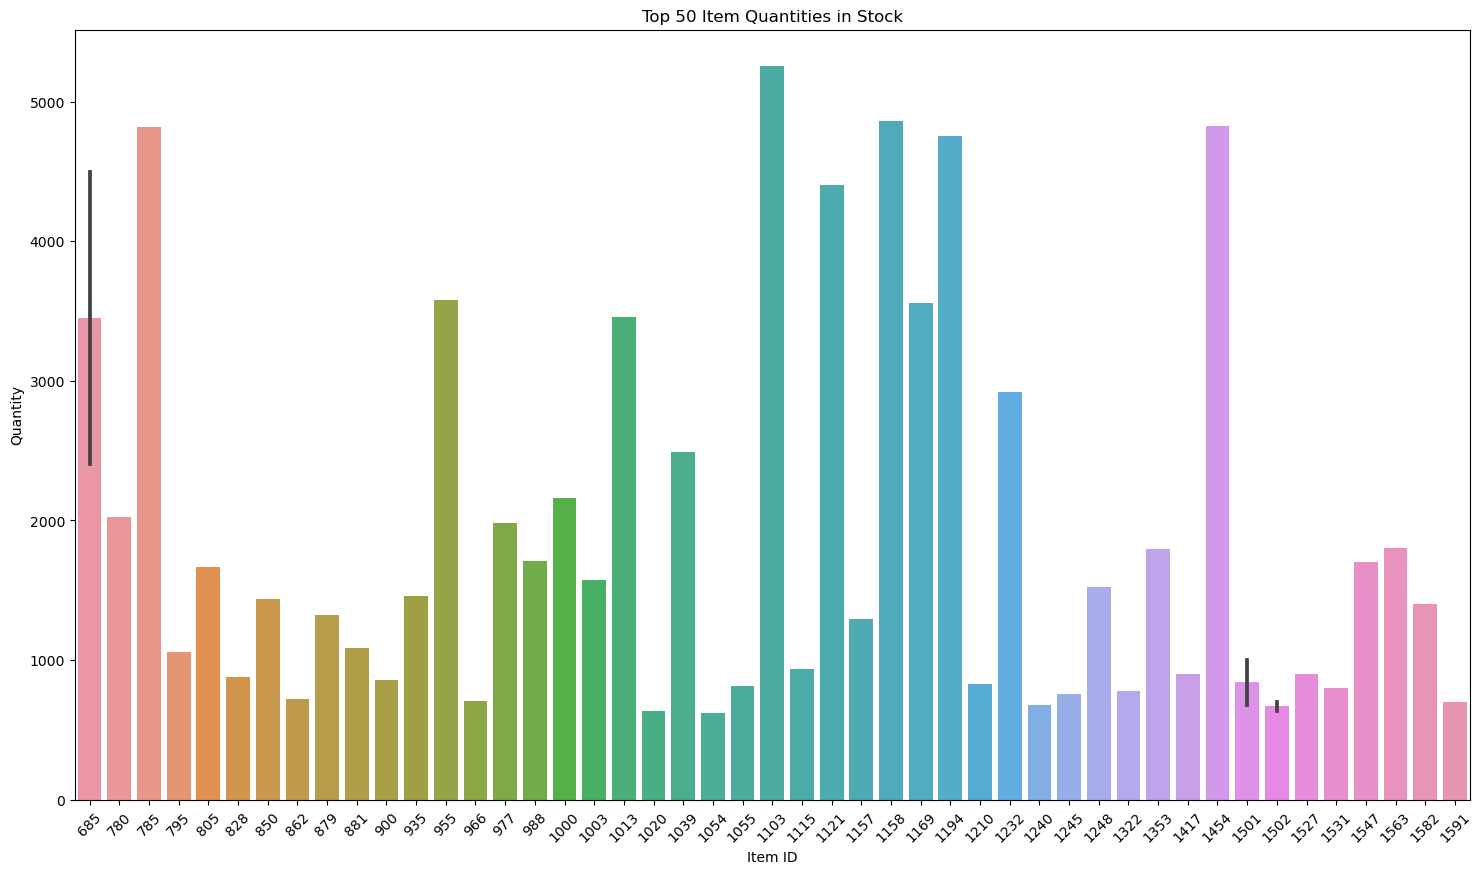

In [46]:
top_items = inv_item_stock.nlargest(50, 'quantity')

# Bar plot of item quantities in stock
plt.figure(figsize=(18, 10))  
sns.barplot(x=top_items['item_id'], y=top_items['quantity'])
plt.title('Top 50 Item Quantities in Stock')
plt.xlabel('Item ID')
plt.ylabel('Quantity')
plt.xticks(rotation=45) 
plt.show()

- The plot visually highlights the top 50 items with the highest quantities in stock, making it easy to identify which items are most abundant.


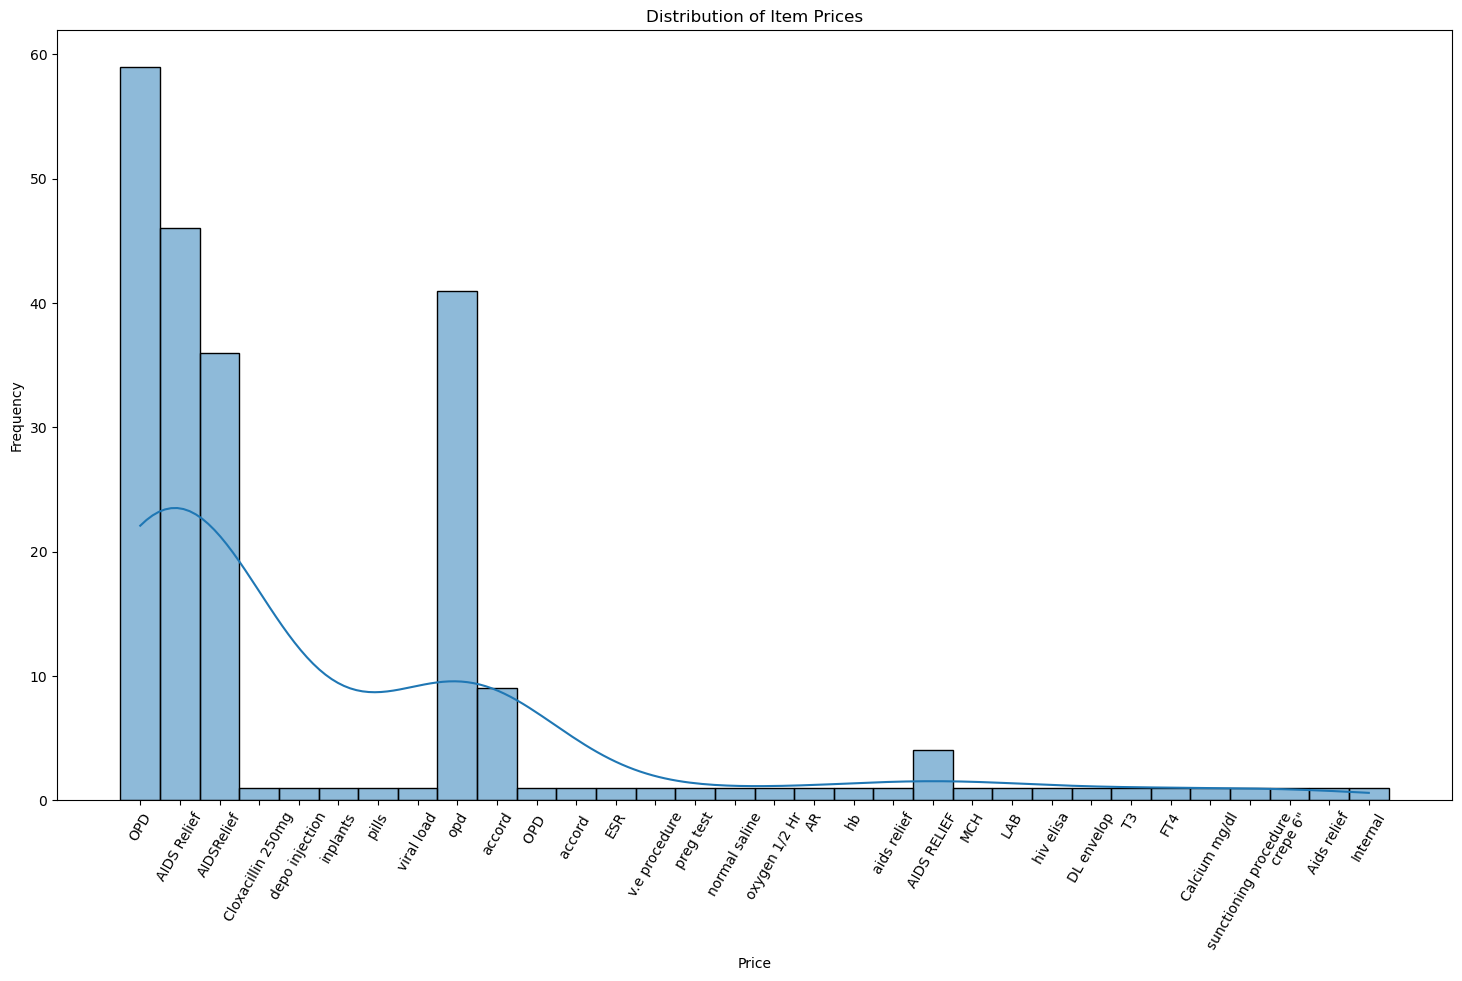

In [47]:
# Distribution of item prices
plt.figure(figsize=(18, 10))  
sns.histplot(inv_item_price['price'], bins=15, kde=True)  
plt.title('Distribution of Item Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xticks(rotation=60) 
plt.show()

- Price Distribution: The histogram visually represents the distribution of item prices, showing how frequently different price ranges occur.The height of the bars indicates how many items fall within each price range, with that the KDE line provides a smoothed view of the distribution, helping to identify trends and patterns in the data, such as peaks and valleys.

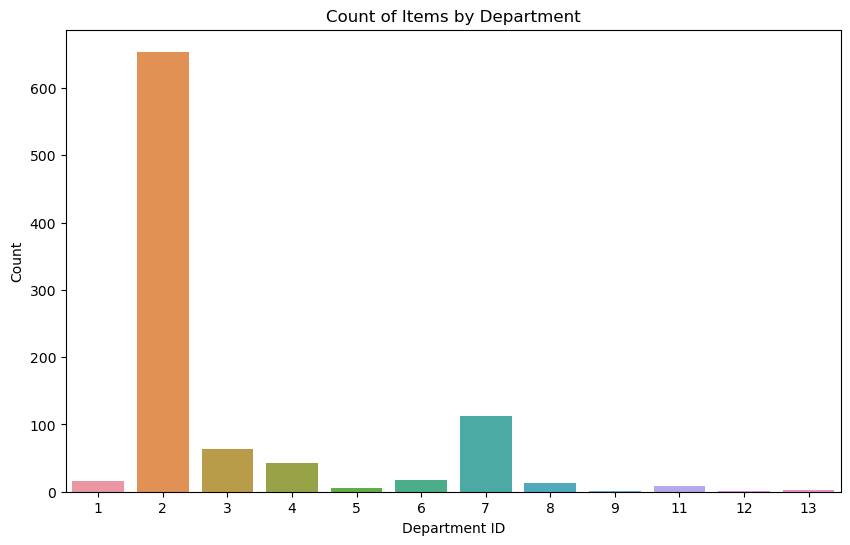

In [48]:
# Count of items by department
plt.figure(figsize=(10, 6))
sns.countplot(x=inv_item['department_id'])
plt.title('Count of Items by Department')
plt.xlabel('Department ID')
plt.ylabel('Count')
plt.show()

- The count plot visually represents the distribution of items across different departments, showing how many items belong to each department.

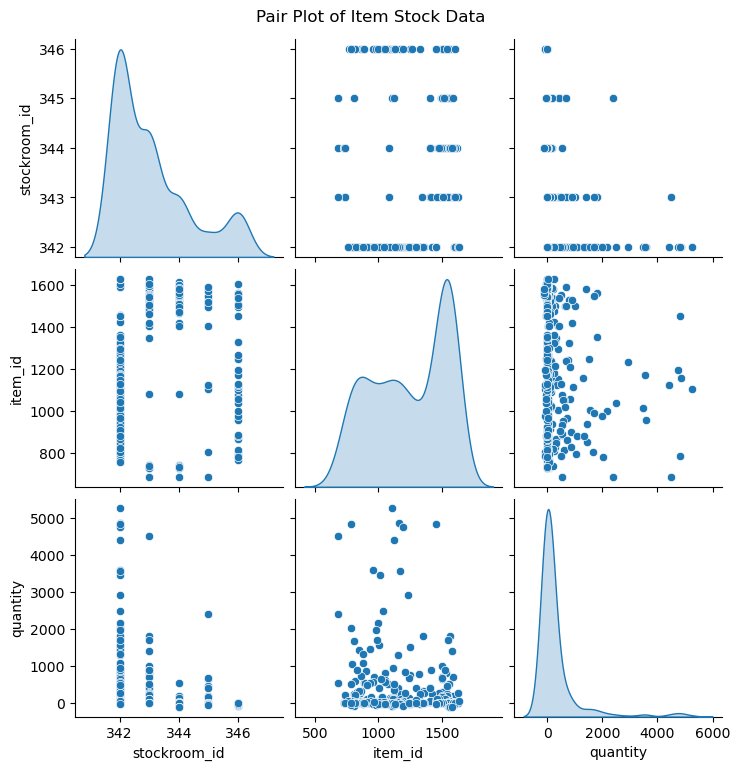

In [49]:
# Pair plot to visualize relationships between multiple variables
sns.pairplot(inv_item_stock, diag_kind='kde')
plt.suptitle('Pair Plot of Item Stock Data', y=1.02)
plt.show()

- Each cell in the matrix represents a scatter plot of two variables from the inv_item_stock DataFrame.The scatter plots show the relationship between pairs of variables, allowing for visual inspection of correlation.From this there are strong linear relationships between certain pairs of variables, indicating high correlation and Some variables have skewed distributions, as shown by the KDE plots on the diagonal.Finally a few outliers are present in the scatter plots, which may need further investigation.

- The analysis of the inventory data provided insights into various aspects of the inventory items, their prices, stock levels, and stockroom details.

- Finally exported the cleaned data to respective csv files.

In [50]:

inv_item.to_csv('inv_item_exported.csv')


inv_item_price.to_csv('inv_item_price_exported.csv')


inv_item_stock.to_csv('inv_item_stock_exported.csv')


inv_stockroom.to_csv('inv_stockroom_exported.csv')
